In [472]:
import numpy as np

In [473]:
transition = np.zeros((21 + 1, 2, 21 + 1))

for state in range(21):
    transition[state, 0, 21] = 1
    posible_states = min(21 - state, 11)
    if (state > 21 - 11):
        transition[state, 1, 21] = (11 - posible_states) / 11
    for next_state in range(state + 1, state + posible_states + 1):
        transition[state, 1, next_state] = 1 / posible_states

# transition

In [474]:
rewards = np.zeros((21 + 1, 2, 21 + 1))

for state in range(21):    
    rewards[state, 0, 21] = state

# rewards

In [475]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.expand_frame_repr", False)

import matplotlib.pyplot as plt

class ValueIteration:
    def __init__(self, reward_function, transition_model, gamma):
        self.num_states = transition_model.shape[0]
        self.num_actions = transition_model.shape[1]
        self.reward_function = np.nan_to_num(reward_function)
        self.transition_model = transition_model
        self.gamma = gamma
        self.q_values = np.zeros((self.num_states, self.num_actions))
        self.policy = None

    def one_iteration(self):
        delta = 0
        for s in range(self.num_states):
            temp = max(self.q_values[s])
            for a in range(self.num_actions):
                p = self.transition_model[s, a]
                v_state = np.zeros(self.num_states)
                for n in range(len(p)):
                    v_state[n] = p[n] * (
                        self.reward_function[s, a, n] + self.gamma * max(self.q_values[n]))
                self.q_values[s, a] = np.sum(v_state)
            delta = max(delta, abs(temp - max(self.q_values[s])))
        return delta

    def get_policy(self):
        pi = np.ones(self.num_states, dtype=np.int8) * -1
        for s in range(self.num_states):
            pi[s] = np.argmax(self.q_values[s])
        return pi

    def train(self, tol=1e-3, plot=True):
        epoch = 0
        delta = self.one_iteration()
        delta_history = [delta]
        while delta > tol:
            epoch += 1
            delta = self.one_iteration()
            delta_history.append(delta)
            if delta < tol:
                break
            
        self.policy = self.get_policy()

        print(f'Número de iterações: {len(delta_history)}')
        print(f'Deltas = {delta_history}')

        df = pd.DataFrame([self.policy], index=['\u03C0*'])
        display(df)

        if plot is True:
            _, ax = plt.subplots(1, 1, figsize=(3, 2), dpi=200)
            ax.plot(np.arange(len(delta_history)) + 1, delta_history, marker='o', markersize=4,
                    alpha=0.7, color='#2ca02c', label=r'$\gamma= $' + f'{self.gamma}')
            ax.set_xlabel('Iterações')
            ax.set_ylabel('Delta')
            ax.legend()
            plt.tight_layout()
            plt.show()

Número de iterações: 8
Deltas = [20.0, 5.4, 3.987966942148761, 1.548841256574006, 0.3666922239771875, 0.05985500679520683, 0.007142707386346814, 0.00064261696618928]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
π*,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0


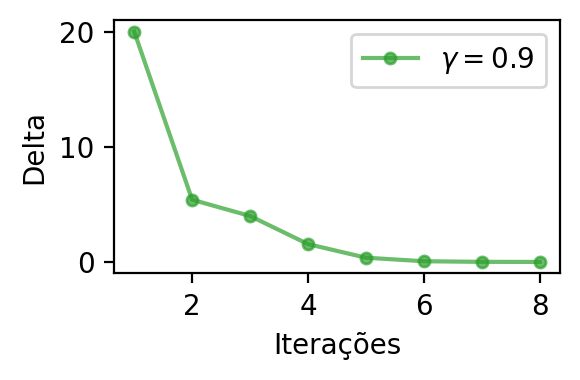

In [476]:
solver = ValueIteration(rewards, transition, gamma=0.9)
solver.train()